Данные могут поступать в разных форматах: это и Excel-таблицы со сложной и не всегда логичной структурой, и загруженные из интернета файлы в формате JSON и XML, имеющие далеко не табличную структуру. Также большие наборы данных часто упакованы в архив — например, в ZIP-папку. Кроме того, распространённой практикой является загрузка данных из файла по URL-ссылке без сохранения файла на диске.

В этом модуле вы познакомитесь с инструментами, предназначенными для чтения данных, сохранённых в разных форматах, и научитесь записывать подготовленные структуры данных в эти форматы.

Для работы с такими данными нужно не только понимать особенности их структуры, но и уметь использовать специальные инструменты: библиотеки, методы и функции.

✍ Данный модуль является бонусным. Задания в нем не оцениваются.

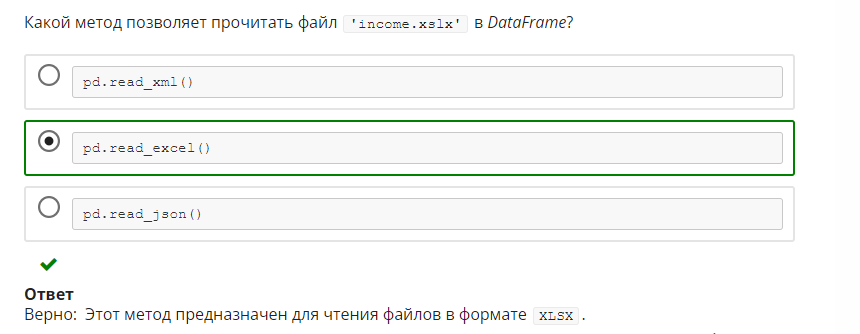

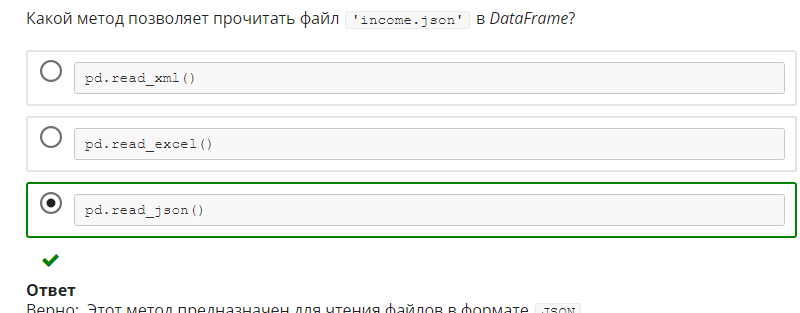

Также вам известно, что, указав определенные значения параметров функции read_csv(), можно считать данные из файла, в котором используется разделитель данных, отличный от запятой (sep), вместо десятичной точки используется другой символ (decimal), а также при считывании должно быть пропущено некоторое количество строк (skiprows). 

Такие данные обычно хранятся в текстовых файлах с расширением TXT. Этот тип файлов — источник данных, который легко расшифровывать и интерпретировать. Для чтения данных из файлов такого типа Pandas, помимо функции read_csv(), предлагает и функцию read_table().

Функция read_csv(), как вы уже знаете, загружает данные с разделителями из файла, URL-адреса, и в качестве разделителя по умолчанию используется запятая (символ). В документации эта функция описана как «Чтение данных из файла значений, разделённых запятыми (CSV), в DataFrame».
Функция read_table() также загружает данные с разделителями из файла, URL-адреса, но в качестве разделителя по умолчанию используется символ табуляции ('\t'). В документации эта функция описана как «Чтение данных из файл значений с разделителями в DataFrame».
Данные функции используются похожим образом, и то, что в настоящий момент поддерживаются они обе, обусловлено тем, что многие пользователи продолжают использовать функцию read_table(). Так, например, поиск на GitHub даёт более пятидесяти тысяч результатов по запросу "pd.read_table".

Для демонстрации использования функции read_table() выполним следующее: 

используя  функцию read_csv(), считаем данные из файла countries.csv в переменную countries_data, создав объект DataFrame;
используя уже знакомую функцию to_csv(), выгрузим этот DataFrame в файл countries.txt (с расширением TXT), который сохраним в папке data. В качестве разделителя используется символ пробела (" ").

Файл countries.csv ранее был вами сохранен в папке data. Если вы потеряли эти данные, скачайте файл по ссылке и сохраните в папке data.

In [ ]:
import pandas as pd # Импорт библиотеки pandas — при выполнении последовательно всех примеров ниже, импорт библиотеки pandas выполняется один раз
countries_data = pd.read_csv('countries.csv', sep=';') # Загружаем данные из файла в переменную, создавая объект DataFrame
countries_data.to_csv('countries.txt', index=False, sep=' ') # Выгружаем данные из DataFrame в CSV-файл и сохраняем файл в папке data

Считаем данные из файла countries.txt в переменную txt_df  (объект DataFrame), применив функцию read_table() с параметрами sep=' '  и  index_col=['country'] (так мы избавимся от столбца с индексом и присвоим названия строкам, используя данные одного из столбцов). Выводим на экран полученный результат:

In [6]:
txt_df = pd.read_table('countries.txt', sep=' ', index_col=['country'])# Загружаем данные из файла в переменную, создавая объект DataFrame
display(txt_df) # Выводим содержимое DataFrame на экран

,population,square
country,,
Англия,56.29,133396
Канада,38.05,9984670
США,322.28,9826630
Россия,146.24,17125191
Украина,45.50,603628
Беларусь,9.50,207600
Казахстан,17.04,2724902


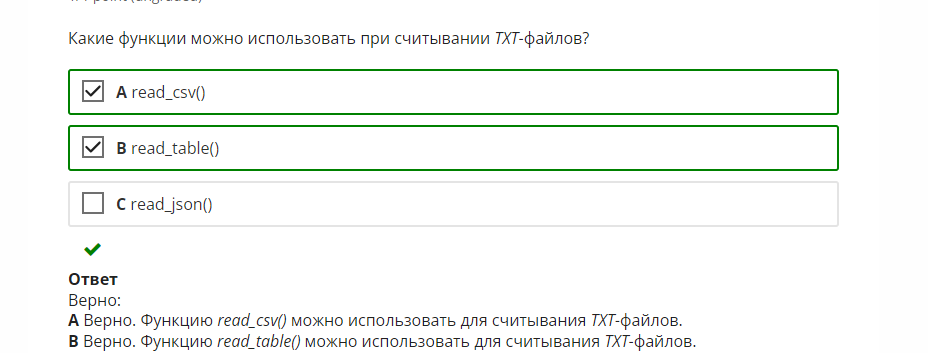

ПРИМЕНЕНИЕ ПАРАМЕТРА HEADER

Используя параметр header, при создании DataFrame мы учитываем наличие/отсутствие строки заголовков в исходном файле данных.

Например, если при считывании данных из ранее сохранённого в папке data файла melb_data_ps.csv указать значение параметра header=None, то первая строка исходного файла не будет восприниматься как строка заголовка и будет отнесена к области данных DataFrame:

РЕШАЕМ ПРОБЛЕМУ С КОДИРОВКОЙ ИСХОДНЫХ ДАННЫХ

При считывании файла и создании DataFrame может возникнуть проблема — при выводе на экран данные будут отображаться в виде нечитаемых символов. Это связано с кодировкой символов в исходном файле.


Для решения проблемы выполним следующие действия:

узнаем, какая кодировка символов используется в считываемом файле (для этого обратимся к субмодулю chardet.universaldetector библиотеки Universal Encoding Detector);
при считывании файла и создании DataFrame будем использовать параметр encoding  —  указывает, какой тип кодировки символов используется в считываемом файле. 

Считываем файл и создаем DataFrame без использования параметра encoding:

In [7]:
data=pd.read_csv('ErrorEnCoding.csv', header=None ) # Считываем данные из файла с неизвестной кодировкой в переменную, создавая объект DataFrame
display(data) # Выводим содержимое DataFrame на экран

UnicodeDecodeError: ignored

Выявлена проблема: при стандартном считывании содержимое файла читается некорректно. Необходимо указать кодировку файла при считывании.

ОПРЕДЕЛЯЕМ КОДИРОВКУ ФАЙЛА

Приведённый ниже код поможет нам определить используемую кодировку в файле, степень достоверности, используемый язык.

In [8]:
from chardet.universaldetector import UniversalDetector # Импортируем субмодуль chardet.universaldetector
detector = UniversalDetector()
with open('ErrorEnCoding.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()

{'encoding': 'KOI8-R', 'confidence': 0.8402412806602051, 'language': 'Russian'}

С достоверностью примерно 84 % тип используемой в файле кодировки — koi8-r. Повторим считывание файла, используя полученные данные.

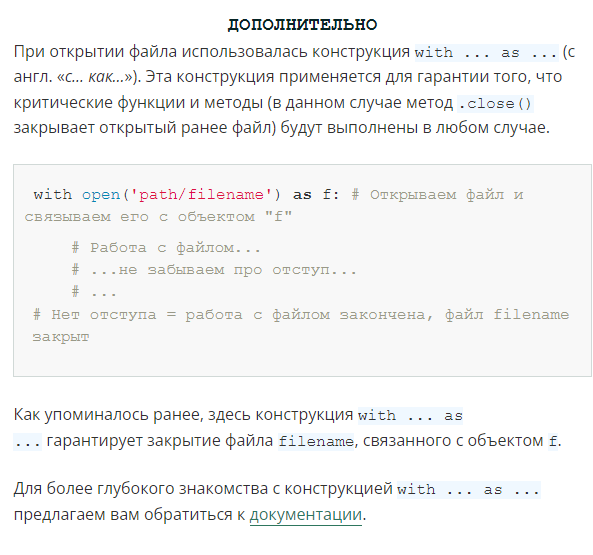

СЧИТЫВАЕМ ФАЙЛ, УКАЗАВ КОДИРОВКУ

Создаем DataFrame из файла, явно указав кодировку символов, и выводим его 

In [10]:
data=pd.read_csv('ErrorEnCoding.csv', encoding='koi8-r', header=None )
display(data)

,0,1,2
0,User_943,Accumanst@gmail.com,Ижевск
1,User_908,Advismowr@mail.ru,Ижевск
2,User_962,Anachso@ukr.net,Краснодар
3,User_973,Antecia@inbox.ru,Пермь
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,Тюмень
96,User_901,V2artierso@mail.ru,Арзангелтск
97,User_970,Vashoterlo@bk.ru,Воронеж
98,User_965,Visuareda@yahoo.com,Воронеж


Проблема, связанная с кодировкой файла, решена.

ЧТЕНИЕ ФАЙЛА ПО ССЫЛКЕ, ИСПОЛЬЗУЯ ФУНКЦИЮ READ_TABLE()

Ранее вы уже считывали данные из файла melb_data.csv, который находится в свободном доступе в интернете, используя функцию read_csv(). Попробуем использовать функцию read_table(), указав в качестве разделителя данных запятую — ','.

In [11]:
data = pd.read_table('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv', sep=',')
display(data)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


Как видим, функция read_table() сработала и с CSV-файлом — достаточно было указать, какой разделитель используется.

ЧТЕНИЕ/ЗАПИСЬ АРХИВИРОВАННЫХ CSV-ФАЙЛОВ

→ Большие по размеру CSV-файлы для экономии памяти часто «упаковывают» в архив, например zip. 

Механизм, используемый в функции read_csv(), позволяет проводить чтение текстового файла из архива, не распаковывая его. Функция read_csv() сама распознает архив и извлекает из него данные (работает практически со всеми zip-архивами). Есть ограничение — файл в zip-архиве должен быть один (если файлов в архиве несколько, то можно разархивировать файлы и работать с каждым вне архива. Подробнее об этом поговорим в юните Итоги).

Ранее вы работали с датасетом students_performance.csv, упакованным в архив. Для работы с файлом вы предварительно проводили распаковку архива. Попробуем начать работу с файлом, не распаковывая его.

Используя функцию read_csv(), загрузите данные из заархивированного датасета  в переменную data() и выведите её содержимое на экран, используя приведённый ниже код:

In [12]:
data = pd.read_csv('students_performance.zip')
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Файл в архиве прочитан без каких-либо проблем, данные из него загружены в переменную data.

В функции to_csv() предусмотрен механизм, позволяющий проводить упаковку CSV-файлов в zip-архив. Проделаем обратную операцию — данные из DataFrame data запишем в CSV-файл, упакуем полученный файл в zip-архив «на лету» и сохраним полученный архив в папке data, выполнив следующий код:

In [13]:
compression_opts = dict(method='zip', archive_name='out.csv') # Определяем параметры архивирования — метод сжатия, имя файл в архиве
data.to_csv('out.zip', index=False, compression=compression_opts)

В ходе выполнения кода содержимое DataFrame сохранено в файле out.csv, файл упакован в архив out.zip, а архив записан в каталог data.

JSON

→ JSON — это простой, структурированный формат обмена данными, основанный на использовании текста.

Под обменом данных в этом контексте чаще всего подразумевается передача данных по компьютерным сетям, например пересылка данных от сервера к браузеру.

Аббревиатура JSON расшифровывается как JavaScript Object Notation, в переводе на русский — система обозначения/записи объектов JavaScript. Несмотря на то, что JSON изначально основывался на языке программирования JavaScript, он является общепризнанным форматом обмена данными, и многие языки программирования, включая Python, содержат эффективные инструменты для работы с ним.

Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом JSON — это критически важный навык, который обязательно необходимо приобрести.

Именно этим мы сейчас и займёмся!

Итак,  JSON — это простой, структурированный, основанный на использовании текста формат обмена данными.

МОДУЛИ ДЛЯ РАБОТЫ С JSON

Для работы с данными в формате JSON используется модуль json из стандартной библиотеки языка Python, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

In [14]:
import json #

Также нам может быть полезен модуль pprint  (от англ. pretty print, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция pprint(), с помощью которой можно красиво выводить на экран содержимое JSON-файла. Для загрузки нужной нам функции перед началом работы выполним следующий код:

In [15]:
from pprint import pprint # Импортируем функцию pprint()

КАК ВЫГЛЯДИТ JSON-ФАЙЛ?

Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

набор пар "ключ-значение", где ключ — это всегда строковая величина (в Python такая структура преобразуется в словарь);

упорядоченный набор значений (при чтении JSON-файла в Python эта структура будет преобразована в список).}

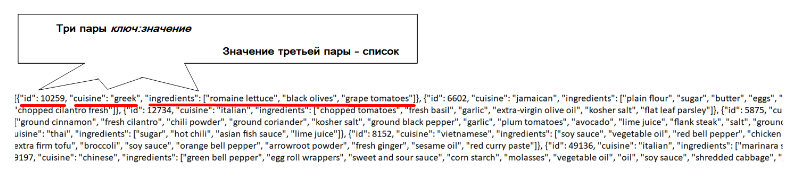

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.

✍️ Мы будем работать с сокращённой версией файла. Скачайте файл, откройте его и посмотрите на содержимое (можно использовать любой текстовый редактор, например Блокнот) . Полный датасет, содержащий более 30 000 записей о блюдах, можно найти и скачать перейдя по ссылке (требуется регистрация). Скопируйте скачанный файл recipes.json в папку, в которой будете работать (в этой же папке вы будете создавать файлы Jupyter Notebook с кодом и запускать код на выполнение).

ОТКРЫВАЕМ JSON-ФАЙЛ

→ Чтобы перевести данные из формата JSON в формат, который можно обрабатывать инструментами Python, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом load() (от англ. загрузить) модуля json, который принимает на вход ссылку на открытый JSON-файл:

In [17]:
with open('recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes

Отлично! Теперь содержимое нашего файла загружено в переменную recipes. Давайте выведем его на экран с помощью функции pprint() из одноимённого модуля:

In [18]:
 pprint(recipes) # Выводим на экран содержимое переменной recipes, используя функция pprint()

Streaming output truncated to the last 5000 lines.
                  'garlic',
                  'corn starch',
                  'sugar',
                  'ground black pepper',
                  'ground pork',
                  'carrots',
                  'fresh ginger',
                  'cooking oil',
                  'salt',
                  'cabbage']},
 {'cuisine': 'mexican',
  'id': 19757,
  'ingredients': ['black beans',
                  'quinoa',
                  'garlic',
                  'lime',
                  'diced tomatoes',
                  'chopped cilantro fresh',
                  'kosher salt',
                  'jalapeno chilies',
                  'frozen corn',
                  'olive oil',
                  'vegetable broth']},
 {'cuisine': 'southern_us',
  'id': 35570,
  'ingredients': ['salt',
                  'butter',
                  'red bell pepper',
                  'black pepper',
                  'okra pods',
                  'yellow b

Попробуйте выполнить этот код. Будьте готовы к тому, что данных в наборе много, поэтому в ячейке Out (если вы работаете с Jupyter Notebook) появится несколько сотен строк.

Просматривать их все не нужно, главное — понять общую структуру объекта recipes:

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

Ключ "cuisine" — обозначает принадлежность блюда к определённой национальной кухне (например, 'greek', 'southern_us', 'filipino' и т. д.);

Ключ "id" — уникальный идентификационный номер блюда;

Ключ "ingredients"— содержит перечень продуктов, входящих в состав блюда.

Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

ИЗВЛЕКАЕМ ДАННЫЕ ИЗ JSON-ФАЙЛА

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — 0, и информация о нём хранится в словаре. Чтобы узнать ID этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [20]:
recipes[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [19]:
recipes[0]['id']

10259

Здесь мы сначала извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:

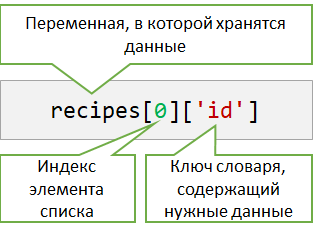

Аналогичным образом, для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на 'ingredients'. 

✍️ А теперь попробуйте решить задачу!

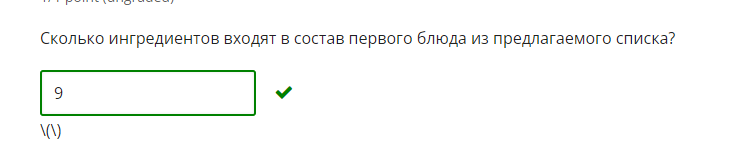

In [23]:
recipes[0]["ingredients"]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [24]:
len(recipes[0]["ingredients"])

9

Мы также можем извлечь информацию о конкретном блюде по его ID. Для этого необходимо с помощью цикла, например for, перебрать все элементы списка, проверяя ключ 'id',  и извлечь нужную информацию, когда мы наконец найдем нужное блюдо.

К какой кухне относится блюдо с id = 13121?

In [28]:
len(recipes)

500

In [29]:
for item in range(len(recipes)):
  if recipes[item]["id"]==13121:
    print(recipes[item]['cuisine'])

thai


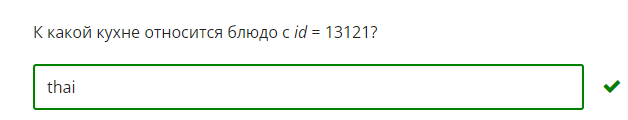

In [30]:
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
with open('recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
for recipe in recipes: # начинаем перебор всех блюд входящих в список
    if recipe['id'] == 13121: # если id текущего блюда равен заданному для поиска
        print(recipe['cuisine']) # выводим на экран наименование кухни, к которой относится блюдо
        break # прерываем выполнение цикла, т.к. нужное блюдо найдено

thai


На практике также иногда возникают задачи по извлечению из JSON-файла обобщённой информации. Давайте попробуем решить две такие задачи.

Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ СПИСКА

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу 'cuisine' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список recipes, не получится применить известный нам метод unique() (этот метод неприменим к словарям), и для извлечения всех уникальных значений нужно перебирать элементы списка в цикле с параметром.

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ МНОЖЕСТВА

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а множества (set). Множество содержит только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда "добавить во множество такое же значение" будет проигнорирована компьютером.

In [32]:
# Используя список        
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
with open('recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
cuisines = [] # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines) # Выводим на экран полученное значение
            


20

In [33]:
# Используя множество
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
with open('recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines) # Выводим на экран полученное значени

20

Какой из национальных кухонь принадлежит самое большое количество рецептов?

In [49]:
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
with open('recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
cuisines = [] # Создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # Начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # Если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # Добавляем его к списку cuisines
valreccuisine = {} # Создаём пустой словарь для хранения информации об количествах рецептов в каждой кухне
for item in cuisines: # Перебираем список кухонь
    valreccuisine[item] = 0 # Добавляем в словарь ключ, соответствующий очередной кухне
for recipe in recipes: # Перебираем список рецептов
    valreccuisine[recipe['cuisine']] += 1 # Увеличиваем значение нужного ключа в словаре на 1
            
print(max(valreccuisine, key=valreccuisine.get)) # Извлекаем значения для всех ключей используя метод get(), выбираем самое максимальное значение (при наличии одинаковых значений будет выбрано первое в словаре) и выводим на экран ключ максимального значения

italian


In [47]:
for item in cuisines: # Перебираем список кухонь
    valreccuisine[item] = 0 #

In [41]:
cuisines[:4]

['greek', 'southern_us', 'filipino', 'indian']

In [54]:
list(valreccuisine.keys())[:4],list(valreccuisine.values())[:4]

(['greek', 'southern_us', 'filipino', 'indian'], [15, 52, 11, 41])

In [55]:

# function to return key for any value
def get_key(val):
    for key, value in valreccuisine.items():
        if val == value:
            return key
 
    return "key doesn't exist"

In [56]:
print(get_key(101))

italian


In [60]:
# function to return key for any value
def get_key(cousine):
    for key, value in valreccuisine.items():
        if cousine == key:
            return value
 
    return "key doesn't exist"

In [61]:
print(get_key("italian"))

101


In [46]:
valreccuisine

{'greek': 15,
 'southern_us': 52,
 'filipino': 11,
 'indian': 41,
 'jamaican': 6,
 'spanish': 12,
 'italian': 101,
 'mexican': 79,
 'chinese': 39,
 'british': 9,
 'thai': 17,
 'vietnamese': 9,
 'cajun_creole': 16,
 'brazilian': 3,
 'french': 25,
 'japanese': 24,
 'irish': 9,
 'korean': 21,
 'moroccan': 9,
 'russian': 2}